In [44]:
import pandas as pd
import requests

In [45]:
API_STARTPOINT = "https://devtest.fueblabs.com/rest/logsData"

In [46]:
session = requests.Session()
session.auth = ('rajathtest@gmail.com','fueb1')

In [48]:
r = session.get(url=API_STARTPOINT)

In [49]:
k = r.json()

In [50]:
k

[{'date': '2020-01-06 19:08:33',
  'dimmerFlag': False,
  'event': '63_fueb1_Switch_L3 changed from ON to OFF'},
 {'date': '2020-01-06 19:09:09',
  'dimmerFlag': True,
  'event': 'dimmer2 changed from NULL to 17'},
 {'date': '2020-01-06 19:09:40',
  'dimmerFlag': True,
  'event': 'dimmer changed from 44 to 62'},
 {'date': '2020-01-06 19:09:49',
  'dimmerFlag': False,
  'event': '63_fueb1_Switch_L2 changed from OFF to ON'},
 {'date': '2020-01-08 11:43:36',
  'dimmerFlag': False,
  'event': '63_fueb1_Switch_L1 changed from OFF to ON'},
 {'date': '2020-01-08 11:44:26',
  'dimmerFlag': True,
  'event': 'dimmer2 changed from 17 to 100'},
 {'date': '2020-01-08 11:45:11',
  'dimmerFlag': True,
  'event': 'dimmer2 changed from 100 to 0'},
 {'date': '2020-01-08 11:46:49',
  'dimmerFlag': False,
  'event': '63_fueb1_Switch_L2 changed from ON to OFF'},
 {'date': '2020-01-08 11:47:07',
  'dimmerFlag': False,
  'event': '63_fueb1_Switch_L2 changed from OFF to ON'},
 {'date': '2020-01-16 14:03:13',


In [51]:
df = pd.DataFrame(k)

In [52]:
df.columns = ['time stamp', 'dimmer', 'switch name with changed state']

In [53]:
rdf = df[['time stamp','dimmer','switch name with changed state']]

In [54]:
rdf["switch name"] = ""
rdf["changed state"] = ""
rdf["initial value"] = ""
rdf["final value"] = ""

In [55]:
for i in range(len(rdf)):
    rdf.loc[:,("switch name")][i] = rdf.loc[:,('switch name with changed state')][i].split(" ")[0]
    rdf.loc[:,("changed state")][i] = rdf.loc[:,('switch name with changed state')][i].split(" ")[3]+" "+rdf.loc[:,('switch name with changed state')][i].split(" ")[4]+" "+rdf.loc[:,('switch name with changed state')][i].split(" ")[5]
    rdf.loc[:,("initial value")][i] = rdf.loc[:,('switch name with changed state')][i].split(" ")[3]
    rdf.loc[:,("final value")][i] = rdf.loc[:,('switch name with changed state')][i].split(" ")[5]

/home/rajath/.virtualenvs/djangoapps/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/rajath/.virtualenvs/djangoapps/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rajath/.virtualenvs/djangoapps/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/

In [56]:
rdf

,time stamp,dimmer,switch name with changed state,switch name,changed state,initial value,final value
0,2020-01-06 19:08:33,False,63_fueb1_Switch_L3 changed from ON to OFF,63_fueb1_Switch_L3,ON to OFF,ON,OFF
1,2020-01-06 19:09:09,True,dimmer2 changed from NULL to 17,dimmer2,NULL to 17,NULL,17
2,2020-01-06 19:09:40,True,dimmer changed from 44 to 62,dimmer,44 to 62,44,62
3,2020-01-06 19:09:49,False,63_fueb1_Switch_L2 changed from OFF to ON,63_fueb1_Switch_L2,OFF to ON,OFF,ON
4,2020-01-08 11:43:36,False,63_fueb1_Switch_L1 changed from OFF to ON,63_fueb1_Switch_L1,OFF to ON,OFF,ON
5,2020-01-08 11:44:26,True,dimmer2 changed from 17 to 100,dimmer2,17 to 100,17,100
6,2020-01-08 11:45:11,True,dimmer2 changed from 100 to 0,dimmer2,100 to 0,100,0
7,2020-01-08 11:46:49,False,63_fueb1_Switch_L2 changed from ON to OFF,63_fueb1_Switch_L2,ON to OFF,ON,OFF
8,2020-01-08 11:47:07,False,63_fueb1_Switch_L2 changed from OFF to ON,63_fueb1_Switch_L2,OFF to ON,OFF,ON
9,2020-01-16 14:03:13,False,63_fueb1_Switch_L2 changed from ON to OFF,63_fueb1_Switch_L2,ON to OFF,ON,OFF


In [57]:
rdf.replace(('NULL','ON', 'OFF'), (0, 1, 0), inplace=True)

In [58]:
rdf

,time stamp,dimmer,switch name with changed state,switch name,changed state,initial value,final value
0,2020-01-06 19:08:33,False,63_fueb1_Switch_L3 changed from ON to OFF,63_fueb1_Switch_L3,ON to OFF,1,0
1,2020-01-06 19:09:09,True,dimmer2 changed from NULL to 17,dimmer2,NULL to 17,0,17
2,2020-01-06 19:09:40,True,dimmer changed from 44 to 62,dimmer,44 to 62,44,62
3,2020-01-06 19:09:49,False,63_fueb1_Switch_L2 changed from OFF to ON,63_fueb1_Switch_L2,OFF to ON,0,1
4,2020-01-08 11:43:36,False,63_fueb1_Switch_L1 changed from OFF to ON,63_fueb1_Switch_L1,OFF to ON,0,1
5,2020-01-08 11:44:26,True,dimmer2 changed from 17 to 100,dimmer2,17 to 100,17,100
6,2020-01-08 11:45:11,True,dimmer2 changed from 100 to 0,dimmer2,100 to 0,100,0
7,2020-01-08 11:46:49,False,63_fueb1_Switch_L2 changed from ON to OFF,63_fueb1_Switch_L2,ON to OFF,1,0
8,2020-01-08 11:47:07,False,63_fueb1_Switch_L2 changed from OFF to ON,63_fueb1_Switch_L2,OFF to ON,0,1
9,2020-01-16 14:03:13,False,63_fueb1_Switch_L2 changed from ON to OFF,63_fueb1_Switch_L2,ON to OFF,1,0


In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

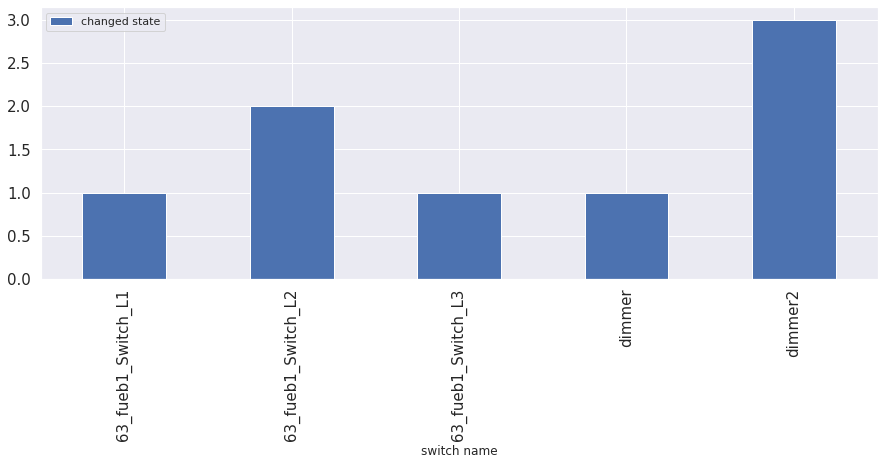

In [60]:
rdf.groupby('switch name')['changed state'].nunique().plot(figsize=(15, 5),fontsize=15,legend=True,kind='bar')
plt.show()

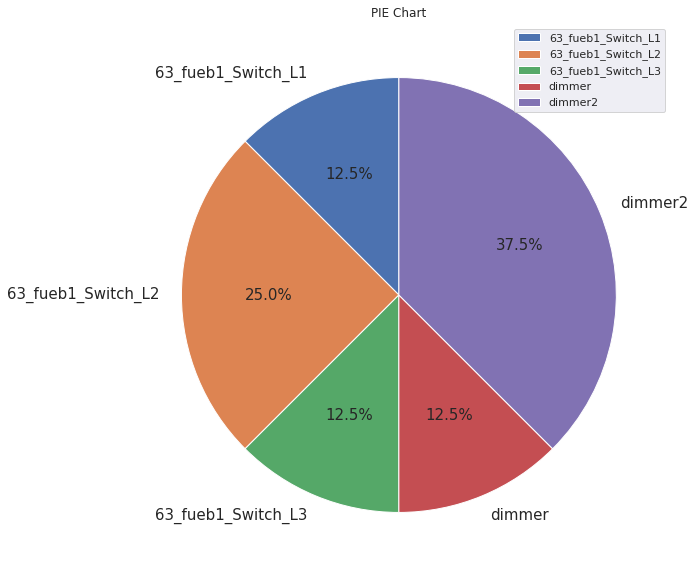

In [61]:
rdf.groupby('switch name')['changed state'].nunique().plot(title="PIE Chart",kind='pie',fontsize=15,legend=True,figsize=(10, 10),autopct='%1.1f%%', startangle=90)
plt.ylabel("")
plt.show()

In [62]:
import seaborn as sns

In [63]:
df_2 = rdf.groupby('switch name').count()

In [64]:
df_2.reset_index(inplace=True)

In [65]:
df_2

,switch name,time stamp,dimmer,switch name with changed state,changed state,initial value,final value
0,63_fueb1_Switch_L1,1,1,1,1,1,1
1,63_fueb1_Switch_L2,4,4,4,4,4,4
2,63_fueb1_Switch_L3,1,1,1,1,1,1
3,dimmer,1,1,1,1,1,1
4,dimmer2,3,3,3,3,3,3


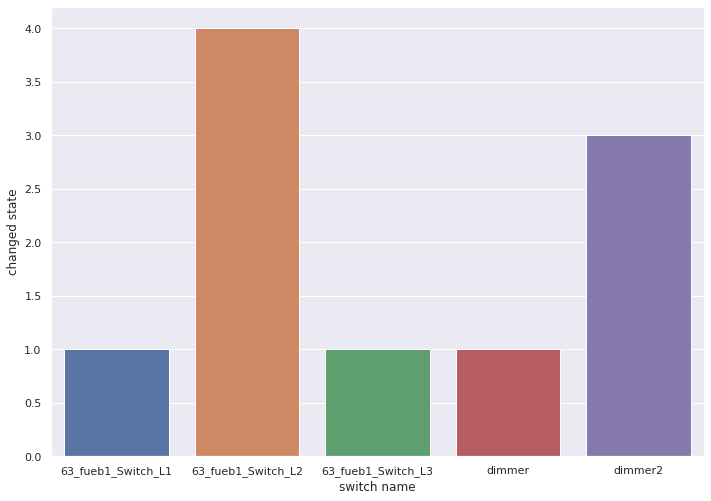

In [66]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='switch name', y='changed state', data=df_2)